<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

<div class="alert alert-block alert-info">
Привет, Вера, меня зовут Наташа.
Спасибо за комментарии. Постаралась все максимально учесть.
</div>

**Ритейл - Анализ программы лояльности.**

В данном проекте необходимо проанализировать программу лояльности магазина строительных материалов «Строили, строили и наконец построили». 
Условия программы лояльности - За 200 рублей в месяц покупатели могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

План исследования:
- Загрузка данных и подготовка к исследованию;
- Исследовательский анализ данных - на данном этапе составим портрет покупателя ;
- Проведем анализ программы лояльности;
- Проверим статистические гипотезы:
    - покупатели - участники программы лояльности приносят больше выручки, чем не участвующие.
    - покупатели - участники программы лояльности совершают покупки чаще, чем не участвующие.


**Описание данных:**


Файл retail_dataset.csv:

- purchaseId — id чека;
- item_ID — id товара;
- purchasedate — дата покупки;
- Quantity — количество товара;
- CustomerID — id покупателя;
- ShopID — id магазина;
- loyalty_program — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- productID — id товара;
- price_per_one — стоимость одной единицы товара;



### Загрузка данных и подготовка к исследованию.

На данном этапе будут произведены следующие действия:
- Импорт необходимых библиотек и загрузка данных;
- Исследование пропущенных значений;
- Исследование соответствия типов данных;
- Исследование дубликатов;
- Проверка корректности наименований колонок.


In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import math as mth
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
retail_dataset = pd.read_csv('/datasets/retail_dataset.csv')
product_codes = pd.read_csv('/datasets/product_codes.csv')

In [3]:
print(retail_dataset.info())
retail_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB
None


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


Начнем с первого датасета. Он содержит 105335 строк. При этом мы видим пропуски в столбце CustomerID - id покупателя. Возможно, данные пропуски связаны с тем, что id есть только у участников программы лояльности. Проверим, так ли это. 

In [4]:
missed = retail_dataset[retail_dataset['CustomerID'].isnull()] #сформируем датасет с покупателями, у которых пропущен id
missed.query('loyalty_program == 1')['CustomerID'].count() #посчитаем, сколько среди них участников программы лояльности

0

Все верно - пропуски связаны с работой программы лояльности. В данном случае заполнить их мы не можем, <div class="alert alert-block alert-info">
Заменим пропуски на заглушки - нули.
   
</div>.


In [5]:
retail_dataset = retail_dataset.fillna('0')

Далее необходимо изменить названия столбцов - привести их к нижнему регистру, у столбцов purchaseid, purchasedate, CustomerID, ShopID - разделить слова нижним подчеркиванием.

Также необходимо заменить тип данных в столбцах с датой и отметкой об участии в программе лояльности на корректный.

In [6]:
# Заменим названия столбцов на более удобные для работы
retail_dataset.columns = retail_dataset.columns.str.lower()

retail_dataset.rename({
                       'purchaseid': 'purchase_id',
                       'purchasedate': 'purchase_date',
                       'customerid': 'customer_id',
                       'shopid': 'shop_id'
                      }, axis=1, inplace=True)

In [7]:
# Изменим типы данных на корректные
retail_dataset['purchase_date'] = pd.to_datetime(retail_dataset['purchase_date'], format = '%Y-%m-%d')
retail_dataset['loyalty_program'] = retail_dataset['loyalty_program'].astype('bool')

In [8]:
print(product_codes.info())
product_codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB
None


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


Во втором датасете пропусков нет. Типы данных корректны. Заменим название столбца productID на корректное.

In [9]:
product_codes = product_codes.rename(columns={'productID': 'product_id'})

In [10]:
# Проверим, есть ли в таблицах дублируещиеся строки
print(retail_dataset.duplicated().sum())
product_codes.duplicated().sum()

1033


0

В таблице retail_dataset присутствует 1033 дубликата, что составляет примерно 1% от общего количества строк и существенно не повлияет на ход исследования. Удалим дублирующиеся строки.

In [11]:
retail_dataset = retail_dataset.drop_duplicates()

Для дальнейшего исследования нам необходимо объединить две имеющиеся таблицы по столбцу c id товара. Убедимся, что каждой позиции товара в таблице с ценами соответсвует одно значение цены.

In [12]:
product_codes['product_id'].nunique()

3159

Цен в таблице больше, чем наименований товаров. Возможно, цены разнятся в разных торговых точках, либо изменяются в зависимости от даты поставки, курса валяют и т.д.

Для дальнейшего исследования заменим данные в таблице с ценами на медианное значение (чтобы снизить вероятность искажений в случае больших колебаний цен).

In [13]:
product_codes = product_codes.groupby('product_id').agg({'price_per_one' : 'median'})

In [14]:
# Перейдем к объединению таблиц 
df = retail_dataset.merge(product_codes, left_on = 'item_id', right_on = 'product_id', how = 'inner')
df.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,False,1.63
1,541104,21873,0,2017-01-13 14:29:00,0,Shop 0,False,1.63
2,540418,21873,1,2017-01-07 11:04:00,0,Shop 0,False,1.63
3,541516,21873,2,2017-01-18 17:34:00,0,Shop 0,False,1.63
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,True,1.63


<div class="alert alert-block alert-info">
Для дальнейшего анализа нам понадобится информация о стоимости товаров в чеке. Добавим столбец.
   
</div>

In [15]:
#Создадим столбец с общей стоимостью каждой позиции товара в чеке
df['amount_good'] = df['quantity']*df['price_per_one']

<div class="alert alert-block alert-info">
Проверим новый столбец на наличие выбросов и аномалий.
   
</div>

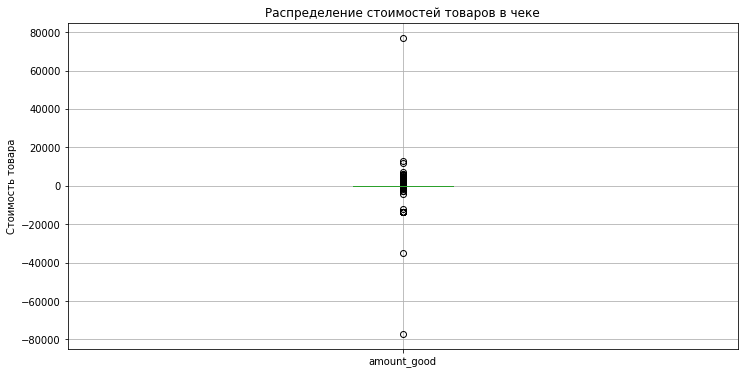

In [16]:
#Построим график, показывающий распределение стоимостей товаров в чеке для анализа выбросов
df.boxplot(column = 'amount_good')
plt.ylabel('Стоимость товара')
plt.title('Распределение стоимостей товаров в чеке')
plt.show() 

<div class="alert alert-block alert-info">
В данных мы видим отрицательные значения стоимостей товаров - вероятно, это возвраты. Также есть аномально большие значения - около 80000р., которые могут исказить статистику. Отбросим отрицательные значения и те, что выше 20000р.
</div>

In [17]:
df = df.query('amount_good > 0  and amount_good <= 20000' )

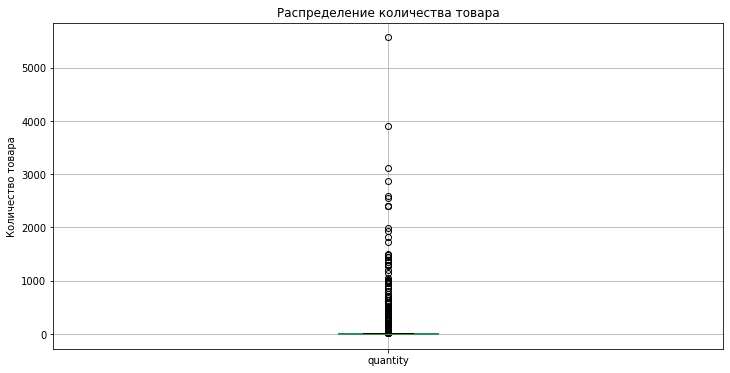

In [18]:
#Аналогичным образом проверим на выбросы и аномилии столбец с количеством товара
df.boxplot(column = 'quantity')
plt.ylabel('Количество товара')
plt.title('Распределение количества товара')
plt.show() 

<div class="alert alert-block alert-info">
Здесь также есть отрицательные значения и аномально большие цифры. Отсчечем данные от 0 до 3000.
</div>

In [19]:
df = df.query('quantity > 0  and quantity <= 3000' )

**Вывод:**

На данном этапе мы подготовили таблицу, необходимую для анализа. 

- Были заменены типы данных в колонках с датой покупки и отметкой об участии в программе лояльности. 
- Данные проверены на дубликаты - удалена 1033 дублирующих строки из датасета retail_dataset.
- Названия столбцов изменены на удобные для анализа.
- В датасете product_codes цены на товары заменены на медианные значения.
- Оба датасета объединены в итоговую таблицу.
- <div class="alert alert-block alert-info">
Удалены выбросы и аномальные значения.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо. В общем предобработка выполнена правильно

Я бы пропуски еще заполнила заглушками
</div>

### Исследовательский анализ данных

На данном этапе будет составлен "портрет" типичного покупателя магазина. Исследуем данные по основным параметрам - средний чек, среднее количество товаров в чеке, сколько в среднем покупок совершает каждый покупатель за исследуемый период.

Для начала изучим, за какой период времени данные мы имеем.

In [20]:
print('Начало периода', df['purchase_date'].min())
print('Конец периода', df['purchase_date'].max())

Начало периода 2016-12-01 08:26:00
Конец периода 2017-02-28 17:01:00


In [21]:
#проверим, сколько уникальных покупателей в датасете
len(df['customer_id'].value_counts())

1670

In [22]:
#проверим,какой % покупателей участвует в программе лояльности
members = df.query('loyalty_program == 1')['customer_id']
members.nunique() / len(df['customer_id'].value_counts()) * 100

33.532934131736525

''

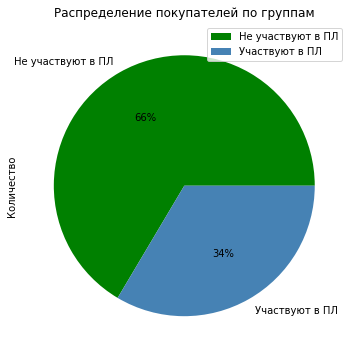

In [23]:
no_members = len(df['customer_id'].value_counts()) - members.nunique()
df_group =  pd.DataFrame({'Группы': ['Участвуют в ПЛ', 'Не участвуют в ПЛ'], 'Количество': [members.nunique(), no_members]})
df_group.groupby(['Группы']).sum().plot(kind='pie', y='Количество', autopct='%1.0f%%', colors = ['green', 'steelblue'], title='Распределение покупателей по группам')
;

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, эта картина в целом согласуется с тестовым периодом программы лояльности
</div>

В программе лояльности участует 33,6% от общего количества покупателей.

In [24]:
#Создадим таблицу для расчета суммы покупки по каждому чеку
average_check = df.groupby('purchase_id').agg({'amount_good' : 'sum'}).reset_index()
average_check.columns = ['purchase_id', 'sum_check']

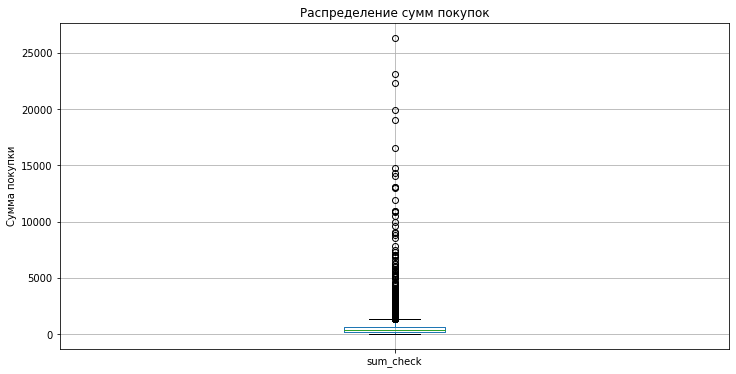

In [25]:
#Построим график, показывающий распределение сумм покупок для анализа выбросов
average_check.boxplot(column = 'sum_check')
plt.ylabel('Сумма покупки')
plt.title('Распределение сумм покупок')
plt.show() 

<div class="alert alert-block alert-info">
На графике мы видим, что распределение сумм покупок довольно неоднородно. Чтобы получить более объективную картину, корректнее использовать для расчета чека медиану.
</div>

In [26]:
#Посчитаем средний чек по всем покупкам. Т.к. данные крайне неоднородны, считаю целесообразным использовать для расчета медиану.
average_check['sum_check'].median()

325.8275000000001

Медианные данные показателя чека составляют 325р.

In [27]:
# Для расчета среднего количества товаров в каждом чеке создадим таблицу
quantity_check = df.groupby('purchase_id').agg({'quantity' : 'sum'}).reset_index()
quantity_check.columns = ['purchase_id', 'quantity_check']

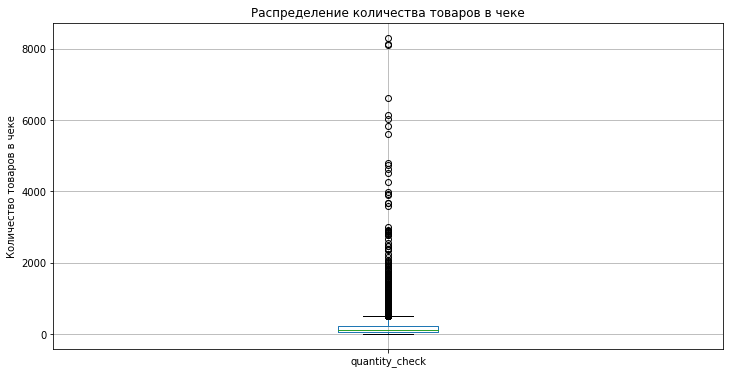

In [28]:
#Построим график, показывающий распределение количества товаров в чеке для анализа выбросов
quantity_check.boxplot(column = 'quantity_check')
plt.ylabel('Количество товаров в чеке')
plt.title('Распределение количества товаров в чеке')
plt.show() 

<div class="alert alert-block alert-info">
Здесь мы также видим неравномерное распределение количества товаров. Будем использовать медианное значение для расчета.
</div>

In [29]:
#Посчитаем среднее количества товаров по всем покупкам.
quantity_check['quantity_check'].median()

110.0

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Давай определимся, что мы делаем с выбросамси и аномалиями. 

Не правильно, для каждого расчета заново делать какие-то фильтры. 

Если какие-то значения искажают общую картину и их нужно отбросить, то это нужно сделать один раз и далее анализировать чистые данные
</div>

<div class="alert alert-block alert-info">
Спасибо, Вера, перенесла работу с выбросами и аномалиями в предобработку. Выводы скорректировала.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, но в общем для фильтрации лучше использовать какие-то перцентили, а не абсолютные величины
</div>

В среднем в каждом чеке содержится 110 товаров.

In [30]:
#cколько в среднем покупок приходится на одного покупателя
number_purchases = round(df.groupby('customer_id').agg({'purchase_id': 'nunique'}).mean(),0)
number_purchases

purchase_id    2.0
dtype: float64

В среднем каждый покупатель совершил 2 покупки в магазине.

**Вывод:**

В датасете содержится информация о покупках 1669 клиентов магазина за период с 1 декабря 2016 года по 28 февраля 2017 года. 

33,6% из них являются участниками программы лояльности. 

Данные крайне неоднородны - вероятно, в магазине совершают покупки как оптовики, так и простые покупатели. Для того, чтобы снизить искажение показателей, для расчета среднего чека и количества товаров использована медиана. 

Медианный чек составляет 325р.

Количество товаров в чеке 110шт.

В среднем каждый покупатель совершает 2 покупки в магазине за исследуемый период.

На следующем этапе проверим эти же показатели для каждой из групп покупателей - участвующих и не участвующих в программе лояльности.


### Aнализ программы лояльности

На данном этапе разделим покупателей на группы – «участвуют в программе лояльности» и «не участвуют в программе лояльности» и посчитаем для каждой группы средний чек, среднее количество товаров в чеке и среднее количество посещений магазина. 

In [31]:
# Разделим покупателей на 2 группы:
group_loyal = df.query('loyalty_program == 1')
group_disloyal = df.query('loyalty_program != 1')

In [32]:
#Создадим таблицу для расчета суммы покупки по каждому чеку. Посчитаем медиану.
average_check_loyal = group_loyal.groupby('purchase_id').agg({'amount_good' : 'sum'}).reset_index()
average_check_loyal.columns = ['purchase_id', 'sum_check']
print('Медианное значение чека у участников программы лояльности: ', average_check_loyal['sum_check'].median())

average_check_disloyal = group_disloyal.groupby('purchase_id').agg({'amount_good' : 'sum'}).reset_index()
average_check_disloyal.columns = ['purchase_id', 'sum_check']
print('Медианное значение чека у остальных покупателей: ', average_check_disloyal['sum_check'].median())

Медианное значение чека у участников программы лояльности:  296.36
Медианное значение чека у остальных покупателей:  351.27500000000003


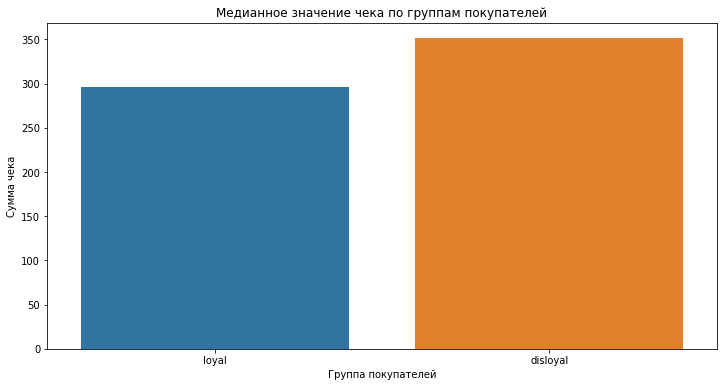

In [33]:
df_average_check = pd.DataFrame({'group': ['loyal', 'disloyal'], 'average_check': [average_check_loyal['sum_check'].median(), average_check_disloyal['sum_check'].median()]})
plt.title('Медианное значение чека по группам покупателей')
sns.barplot(x = 'group', y = 'average_check', data=df_average_check).set(ylabel='Сумма чека', xlabel='Группа покупателей')
plt.show()

Медианное значение чека выше у группы покупателей, не участвующих в программе лояльности.

In [34]:
# Для расчета среднего количества товаров в каждом чеке создадим таблицу. Посчитаем медиану.
quantity_check_loyal = group_loyal.groupby('purchase_id').agg({'quantity' : 'sum'}).reset_index()
quantity_check_loyal.columns = ['purchase_id', 'quantity_check']
print('Медианное значение количества товаров в чеке у участников программы лояльности: ', quantity_check_loyal['quantity_check'].median())

quantity_check_disloyal = group_disloyal.groupby('purchase_id').agg({'quantity' : 'sum'}).reset_index()
quantity_check_disloyal.columns = ['purchase_id', 'quantity_check']
print('Медианное значение количества товаров в чеке у остальных покупателей: ', quantity_check_disloyal['quantity_check'].median())

Медианное значение количества товаров в чеке у участников программы лояльности:  97.0
Медианное значение количества товаров в чеке у остальных покупателей:  117.0


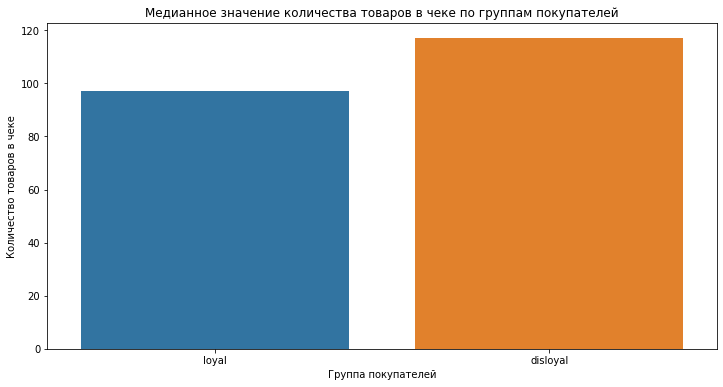

In [35]:
df_average_check = pd.DataFrame({'group': ['loyal', 'disloyal'], 'quantity_check': [quantity_check_loyal['quantity_check'].median(), quantity_check_disloyal['quantity_check'].median()]})
plt.title('Медианное значение количества товаров в чеке по группам покупателей')
sns.barplot(x = 'group', y = 'quantity_check', data=df_average_check).set(ylabel='Количество товаров в чеке', xlabel='Группа покупателей')
plt.show()

Медианное значение количества товаров в чеке также выше у группы покупателей, не участвующих в программе лояльности.

In [36]:
#cколько в среднем покупок приходится на одного покупателя
number_purchases_loyal = round(group_loyal.groupby('customer_id').agg({'purchase_id': 'nunique'}).mean(),0)
print('Среднее количество покупок у участников программы лояльности: ', number_purchases_loyal)

number_purchases_disloyal = round(group_disloyal.groupby('customer_id').agg({'purchase_id': 'nunique'}).mean(),0)
print('Среднее количество покупок у остальных покупателей: ', number_purchases_disloyal)

Среднее количество покупок у участников программы лояльности:  purchase_id    2.0
dtype: float64
Среднее количество покупок у остальных покупателей:  purchase_id    2.0
dtype: float64


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, средний чек и  количество товаров мы посмотрели.
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Но это очень скудный анализ получился.
    
Необходимо как минимум еще рассчитать LTV за 45 дней для двух групп и сравнить
</div>

<div class="alert alert-block alert-info">
Рассчитаем среднее значение LTV, а также среднее количество покупок для двух групп. Т.к. специфика строительного магазина такова, что покупатели совершают покупки не очень часто, в качестве горизонта анализа возьмем 45 дней. 
</div>

In [37]:
# Подготовим таблицу для расчета - добавим столбец с общей суммой покупки по чеку
group_loyal = group_loyal.groupby('purchase_id').agg({'amount_good':'sum','customer_id':'min', 'purchase_date':'min'}).reset_index()
group_loyal.rename(columns = {'amount_good':'sales'}, inplace = True )
group_loyal.head()

,purchase_id,sales,customer_id,purchase_date
0,536365,186.515,23529.0,2016-12-01 08:26:00
1,536366,19.750,23529.0,2016-12-01 08:28:00
2,536372,19.750,23529.0,2016-12-01 09:01:00
3,536373,367.365,23529.0,2016-12-01 09:02:00
4,536375,367.365,23529.0,2016-12-01 09:32:00


In [38]:
# Теперь посчитаем количество покупок и выручку для каждого пользователя. Сгруппируем датафрейм по полю customer_id:
orders_loyal = group_loyal.groupby('customer_id')['sales'].agg(['sum', 'count'])
orders_loyal.head()

,sum,count
customer_id,,
22005.0,227.325,2
22006.0,2171.760,2
22011.0,108.775,1
22012.0,3316.660,3
22018.0,9.350,1


In [39]:
# Чтобы построить когорты, найдем дату первого заказа. 
#Сгруппируем данные по customer_id и найдем минимальное значение поля purchase_date. 
#Результат сохраним в переменную first_orders
first_orders = group_loyal.groupby('customer_id')['purchase_date'].min() 
first_orders.name = 'first_order'
first_orders.head()

customer_id
22005.0   2017-01-09 12:01:00
22006.0   2016-12-05 12:43:00
22011.0   2017-02-07 14:16:00
22012.0   2017-02-03 10:50:00
22018.0   2017-02-28 13:41:00
Name: first_order, dtype: datetime64[ns]

In [40]:
#Добавим дату первой покупки с помощью метода merge() и сохраним получившийся датафрейм в переменную orders_merged
orders_merged = group_loyal.merge(first_orders, how='inner', left_on='customer_id', right_index=True)
orders_merged.head()

,purchase_id,sales,customer_id,purchase_date,first_order
0,536365,186.515,23529.0,2016-12-01 08:26:00,2016-12-01 08:26:00
1,536366,19.750,23529.0,2016-12-01 08:28:00,2016-12-01 08:26:00
2,536372,19.750,23529.0,2016-12-01 09:01:00,2016-12-01 08:26:00
3,536373,367.365,23529.0,2016-12-01 09:02:00,2016-12-01 08:26:00
4,536375,367.365,23529.0,2016-12-01 09:32:00,2016-12-01 08:26:00


In [41]:
#Агрегируем по дате первой покупки и посчитаем нужные показатели:
orders_merged.groupby(['first_order','purchase_date'])['sales'].agg(['sum', 'count']).head()

sum  count
first_order         purchase_date                      
2016-12-01 08:26:00 2016-12-01 08:26:00  186.515      1
                    2016-12-01 08:28:00   19.750      1
                    2016-12-01 09:01:00   19.750      1
                    2016-12-01 09:02:00  367.365      1
                    2016-12-01 09:32:00  367.365      1

In [42]:
#Посчитаем количество дней между покупками.
day45_filter = orders_merged['purchase_date'] - orders_merged['first_order'] <= '45 days'
#Отфильтруем покупки
day45_orders = orders_merged[day45_filter]
day45_orders.head()

,purchase_id,sales,customer_id,purchase_date,first_order
0,536365,186.515,23529.0,2016-12-01 08:26:00,2016-12-01 08:26:00
1,536366,19.750,23529.0,2016-12-01 08:28:00,2016-12-01 08:26:00
2,536372,19.750,23529.0,2016-12-01 09:01:00,2016-12-01 08:26:00
3,536373,367.365,23529.0,2016-12-01 09:02:00,2016-12-01 08:26:00
4,536375,367.365,23529.0,2016-12-01 09:32:00,2016-12-01 08:26:00


In [43]:
#Теперь сгруппируем заказы по дате первой покупки и посчитаем нужные метрики. Результат сохраним в переменную cohorts:
cohorts = day45_orders.groupby(['first_order','purchase_date'])['sales'].agg(['sum', 'count'])
cohorts.head()

sum  count
first_order         purchase_date                      
2016-12-01 08:26:00 2016-12-01 08:26:00  186.515      1
                    2016-12-01 08:28:00   19.750      1
                    2016-12-01 09:01:00   19.750      1
                    2016-12-01 09:02:00  367.365      1
                    2016-12-01 09:32:00  367.365      1

In [44]:
#Посчитаем, сколько в среднем заказов и приносят клиенты 
#в течение 45 дней. Для этого сначала просуммируем показатели каждой когорты, а затем усредним значения методом mean():
cohorts.groupby('first_order').sum().mean()

sum      831.807446
count      1.644404
dtype: float64

В среднем покупатели, участвующие в программе лояльности, в течение 45 дней тратят 832 рубля. и совершают 1,6 покупок. 
<div class="alert alert-block alert-info">
При этом покупатели, участвующие в программе лояльности, также оплачивают доступ в размере 200р. в месяц. Т.к. мы исследуем данные за 45 дней, корректно будет добавить к тратам 400р. Итого эта группа тратит в среднем 1232р. за 45 дней.
</div>
Проверим данные для другой группы покупателей - не участвующих в программе лояльности. Для начала удалим покупателей без id.

In [45]:
group_disloyal = group_disloyal.query('customer_id != 0')

In [46]:
# Подготовим таблицу для расчета - добавим столбец с общей суммой покупки по чеку
group_disloyal = group_disloyal.groupby('purchase_id').agg({'amount_good':'sum','customer_id':'min', 'purchase_date':'min'}).reset_index()
group_disloyal.rename(columns = {'amount_good':'sales'}, inplace = True )
group_disloyal.head()

,purchase_id,sales,customer_id,purchase_date
0,536367,285.395,18726.0,2016-12-01 08:34:00
1,536368,96.090,18726.0,2016-12-01 08:34:00
2,536369,13.200,18726.0,2016-12-01 08:35:00
3,536370,1261.270,18262.0,2016-12-01 08:45:00
4,536371,462.150,19427.0,2016-12-01 09:00:00


In [47]:
# Теперь посчитаем количество покупок и выручку для каждого пользователя. Сгруппируем датафрейм по полю customer_id:
orders_disloyal = group_disloyal.groupby('customer_id')['sales'].agg(['sum', 'count'])
orders_disloyal.head()

,sum,count
customer_id,,
18026.0,1736.520,2
18027.0,2004.205,2
18029.0,386.180,1
18031.0,390.170,1
18035.0,3559.810,1


In [48]:
# Чтобы построить когорты, найдем дату первого заказа. 
#Сгруппируем данные по customer_id и найдем минимальное значение поля purchase_date. 
#Результат сохраним в переменную first_orders
first_orders_disloyal = group_disloyal.groupby('customer_id')['purchase_date'].min() 
first_orders_disloyal.name = 'first_order'
first_orders_disloyal.head()

customer_id
18026.0   2016-12-07 14:57:00
18027.0   2016-12-16 19:09:00
18029.0   2017-02-02 16:01:00
18031.0   2017-02-16 12:33:00
18035.0   2017-01-18 09:50:00
Name: first_order, dtype: datetime64[ns]

In [49]:
#Добавим дату первой покупки с помощью метода merge() и сохраним получившийся датафрейм в переменную orders_merged_disloyal
orders_merged_disloyal = group_disloyal.merge(first_orders_disloyal, how='inner', left_on='customer_id', right_index=True)

In [50]:
#Агрегируем по дате первой покупки и посчитаем нужные показатели:
orders_merged_disloyal.groupby(['first_order','purchase_date'])['sales'].agg(['sum', 'count']).head()

sum  count
first_order         purchase_date                       
2016-12-01 08:34:00 2016-12-01 08:34:00   381.485      2
                    2016-12-01 08:35:00    13.200      1
                    2017-02-03 13:06:00   483.620      1
2016-12-01 08:45:00 2016-12-01 08:45:00  1261.270      1
                    2017-01-07 12:07:00  1275.750      1

In [51]:
#Посчитаем количество дней между покупками.
day45_filter_disloyal = orders_merged_disloyal['purchase_date'] - orders_merged_disloyal['first_order'] <= '45 days'
#Отфильтруем покупки
day45_orders_disloyal = orders_merged_disloyal[day45_filter_disloyal]

In [52]:
#Теперь сгруппируем заказы по дате первой покупки и посчитаем нужные метрики. Результат сохраним в переменную cohorts:
cohorts_disloyal = day45_orders_disloyal.groupby(['first_order','purchase_date'])['sales'].agg(['sum', 'count'])
#Посчитаем, сколько в среднем заказов и приносят клиенты 
#в течение 45 дней. Для этого сначала просуммируем показатели каждой когорты, а затем усредним значения методом mean():
cohorts_disloyal.groupby('first_order').sum().mean()

sum      1250.909559
count       1.840993
dtype: float64

Покупатели, не участвующие в программе лояльности, в среднем совершают 1,8 покупок за 45 дней на сумму 1251р.

**Вывод:**

На данном шаге мы разделили всех покупателей на группы для исследования работы программы лояльности.

По результатам можно сказать, что программа лояльности требует существенных доработок, т.к. группа покупателей - участников имеет более низкий чек, меньшее количество товаров в чеке и при этом посещает магазин с такой же часто, как и те покупатели, которые в программе не участвуют.
<div class="alert alert-block alert-info">
Анализ LTV за 45 дней и среднего количества посещений за 45 дней по когортам показал, что группа покупателей - участников программы лояльности также проигрывает второй группе и по сумме покупок, и по количеству чеков даже с учетом платы за доступ к программе.
</div>


На следующем этапе проверим сделанные выводы с помощью статистических гипотез.

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

При анализе LTV нужно учесть, что участие в программе лояльности платное 200 р  в месяц, это тоже относится к общей выручке от покупателя
</div>

<div class="alert alert-block alert-info">
Спасибо! Учла!
</div>

### Проверка статистических гипотез

Т.к. нашей целью является рост выручки, сделаем акцент на двух параметрах – количестве денег, которые приносят покупатели, и росте количества чеков. В качестве исследуемого периода возьмем первый месяц исследования - декабрь 2016.

Гипотезы будем проверять с помощью критерия Манна- Уитни, так как в данных есть большое количество выбросов, сильно сдвигающих параметрические результаты.

In [53]:
# Получим срез данных по дате
df_stat = df.query("purchase_date >= '2016-12-31'")
# Объединим необходимую информацию в одну таблицу
df_stat = df.groupby(['loyalty_program', 'customer_id']) \
                .agg({'purchase_id': 'nunique', 'amount_good': 'sum'}) \
                .reset_index()
df_stat.rename({'purchase_id': 'number_visits', 'amount_good': 'revenue'}, axis=1, inplace= True)
df_stat.head()

,loyalty_program,customer_id,number_visits,revenue
0,False,18026.0,2,1736.520
1,False,18027.0,2,2004.205
2,False,18029.0,1,386.180
3,False,18031.0,1,390.170
4,False,18035.0,1,3559.810


<div class="alert alert-block alert-info">
Так как группа участников программы лояльности также платит 200р в месяц за доступ к программе, добавим всем участникам +200р. в столбец с выручкой.
</div>

In [54]:
df_stat.loc[df_stat['loyalty_program'] == True, 'revenue'] = df_stat['revenue'] + 200
df_stat.head()

,loyalty_program,customer_id,number_visits,revenue
0,False,18026.0,2,1736.520
1,False,18027.0,2,2004.205
2,False,18029.0,1,386.180
3,False,18031.0,1,390.170
4,False,18035.0,1,3559.810


In [55]:
alpha = 0.05
print('Критический уровень статистической значимости', alpha)

sample = df_stat.pivot_table(index=df_stat.index, values='revenue', columns='loyalty_program')
p_value = stats.mannwhitneyu(sample[0].dropna(), sample[1].dropna())[1]
print("Значение p-value для сравнения выручки {0:.5f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия в выручке')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что статистически значимых различий в выручке нет')

Критический уровень статистической значимости 0.05
Значение p-value для сравнения выручки 0.00000
Отвергаем нулевую гипотезу: есть статистически значимые различия в выручке


<div class="alert alert-block alert-info">
Покупатели из двух групп совершают покупки на разные суммы.
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

1. Опять же если мы говорим о выручке от **покупателя**, то нужно учитывать стоимость участия в программе
    
2. Выводы как-то противореяат полученному результату
</div>

<div class="alert alert-block alert-info">
Добавила стоимость участия, выводы скорректировала.
</div>

**Проверим вторую гипотезу:**

"Покупатели - участники программы лояльности совершают покупки чаще, чем не участвующие";

H_0: Среднее количество чеков покупателей - участников ПЛ в декабре = Среднему количеству чеков прочих покупателей в декабре

H_1: Среднее количество чеков покупателей - участников ПЛ в декабре ≠  Среднему количеству чеков прочих покупателей в декабре

alpha = 0.05

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

Так и напиши в гипотезе среднее количество чеков(покупок).

Что такое частота визитов? Как мы вообще можем визиты по нашим данным посмотреть?
</div>

<div class="alert alert-block alert-info">
Исправила! Частоту визитов не можем посмотреть, т.к. не любой визит заканчивается покупкой. Разницу поняла)
</div>

In [56]:
alpha = 0.05
print('Критический уровень статистической значимости', alpha)

sample = df_stat.pivot_table(index=df_stat.index, values='number_visits', columns='loyalty_program')

p_value = stats.mannwhitneyu(sample[0].dropna(), sample[1].dropna())[1]
print("Значение p-value для сравнения количества чеков {0:.5f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем количестве чеков ")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве чеков нет")

Критический уровень статистической значимости 0.05
Значение p-value для сравнения количества чеков 0.02868
Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем количестве чеков 


<div class="alert alert-block alert-info">
Покупатели из двух групп посещают магазин с разной частотой.
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера - 2**

**#ошибка**

И опять же выводы не соответствуют полученным результата.

И не придумывай каких-то сложных терминов, тебя не правильно поймут. Периодичность посещений - это время между походами в магазин. Ты смотришь количество чеков, так и пиши
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Гипотезы сформулированы и проверены правильно
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Но 
    
1. Мы проверяем равенство средних, т.е. в гипотезах это нужно указать, не просто выручка и частота, а именно средние покзатели двух групп
    
2. Давай посмотрим на эти средние показатели, какие они, как отличаются
    
3. Давай сделаем какие-то существенные выводы из проверки гипотез, чтобы было понятно, почему мы именно эти гипотезы проверяли и как это повлияет на нашу задачу, на бизнес в целом
</div>

<div class="alert alert-block alert-info">
Спасибо! Формулировки исправила, выводы добавляю.
</div>

<div class="alert alert-block alert-info">
Вывод:
    
Программа лояльности введена в магазине для того, чтобы повышать выручку. Согласно имеющейся информации за 200р. в месяц покупатели получают доступ к скидкам и спец. предложениям. 
    
 На мой взгляд, программа лояльности может сработать в нескольких направлениях:
- участники программы лояльности будут совершать более крупные покупки (т.е. вырастет total cost)
- участники программы лояльности будут совершать покупки на ту же сумму, но при этом будут чаще посещать магазин (т.е. вырастет среднее количество посещений).
    
 Исходя из этой идеи было проверено две гипотезы - о равенстве средних чеков и среднем количестве чеков между покупателями, участвующими и не участвующими в программе лояльности. В качестве периода исследования выбран первый месяц - декабрь.
    
Проверка гипотез показала, что группы имеют статистически значимые различия и с количестве чеков, и в суммах выручки.

</div>

### Выводы и рекоммендации

В данном исследовании была рассмотрена работа программы лояльности строительного магазина. Условия программы -  за 200 рублей в месяц покупатели могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

На первом этапе была подготовлена таблица, необходимая для анализа:
- Были заменены типы данных в колонках с датой покупки и отметкой об участии в программе лояльности. 
- Данные проверены на дубликаты - удалена 1033 дублирующих строки из датасета retail_dataset.
- Названия столбцов изменены на удобные для анализа.
- В датасете product_codes цены на товары заменены на медианные значения.
- Оба датасета объединены в итоговую таблицу. В датасете содержится информация о покупках 1670 клиентов магазина за период с 1 декабря 2016 года по 28 февраля 2017 года. 33,6% из них являются участниками программы лояльности.

Далее был составлен портрет типичного покупателя магазина. 
Данные крайне неоднородны - вероятно, в магазине совершают покупки как оптовики, так и простые покупатели. Для того, чтобы снизить искажение показателей, для расчета среднего чека и количества товаров использована медиана.
Медианный чек составляет 325р.
Количество товаров в чеке 110шт.
В среднем каждый покупатель совершает 2 покупки в магазине за исследуемый период.
Далее покупатели были разделены на 2 группы – участвующие и не участвующие в программе лояльности. Для каждой группы посчитано медианное значение чека, количество товаров в чеке и частота посещений магазина за исследуемый период. 

Проведен анализ LTV и среднего количества посещений за 45 дней. Он показал, что группа покупателей - участников программы лояльности также проигрывает второй группе и по сумме покупок, и по количеству чеков, даже с учетом платы за участие в программе

По результатам можно сказать, что программа лояльности требует существенных доработок, т.к. группа покупателей - участников имеет более низкий чек, меньшее количество товаров в чеке и при этом посещает магазин с такой же часто, как и те покупатели, которые в программе не участвуют.


**Вывод:**  

Имеющаяся программа лояльности не стимулирует покупателей совершать более крупные покупки или ходить в магазин чаще. Возможно, клиенты покупают доступ к программе ради скидки на текущую покупку (например, когда скидка на покупку получается больше, чем 200р., которые покупатель платит за участие), либо ради подарков. 

Вероятно, стоит пересмотреть саму систему – например, привязать уровень скидки к сумме покупки или к накопленной сумме покупок. Либо рассмотреть другие методы стимулирования продаж.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В целом выводы соответствуют целям и задачам проекта
</div>